<a href="https://colab.research.google.com/github/drishtiiii/Brain-Tumor-Detection-VGG16-Model/blob/main/Copy_of_Brain_tumorDetection_using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive_31.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
import keras,os
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [5]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/archive_3/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/archive_3/validation", target_size=(224,224))

Found 1792 images belonging to 2 classes.
Found 1208 images belonging to 2 classes.


In [6]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/archive_3/train',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
    )

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/archive_3/validation',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
    )

Found 1792 files belonging to 2 classes.
Found 1208 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
from keras.applications.vgg16 import VGG16
model = VGG16(input_shape=(224,224,3))

print(model.summary())
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [11]:
train_path = '/content/archive_3/train'
valid_path = '/content/archive_3/validation'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 1792 images belonging to 2 classes.
Found 1208 images belonging to 2 classes.


In [12]:
..hist=model.fit_generator(steps_per_epoch=5,generator=traindata,validation_data=testdata,epochs=10)

<ipython-input-12-ba5ea75a0360>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(steps_per_epoch=5,generator=traindata,validation_data=testdata,epochs=10)


Epoch 1/10
5/5 [==============================] - 1265s 294s/step - loss: 435.7870 - accuracy: 0.4938 - val_loss: 0.6964 - val_accuracy: 0.5265
Epoch 2/10
5/5 [==============================] - 1252s 293s/step - loss: 0.7186 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.4735
Epoch 3/10
5/5 [==============================] - 1250s 293s/step - loss: 0.6634 - accuracy: 0.5875 - val_loss: 0.9741 - val_accuracy: 0.5265
Epoch 4/10
5/5 [==============================] - 1206s 281s/step - loss: 0.7650 - accuracy: 0.5250 - val_loss: 0.8468 - val_accuracy: 0.4735
Epoch 5/10
5/5 [==============================] - 1257s 294s/step - loss: 0.7395 - accuracy: 0.4938 - val_loss: 0.6928 - val_accuracy: 0.4818
Epoch 6/10
5/5 [==============================] - 1254s 293s/step - loss: 0.7206 - accuracy: 0.5063 - val_loss: 0.6907 - val_accuracy: 0.6813
Epoch 7/10
5/5 [==============================] - 1250s 293s/step - loss: 0.6939 - accuracy: 0.5813 - val_loss: 0.6893 - val_accuracy: 0.6639
Epoc

In [15]:
model.evaluate(testdata)

38/38 [==============================] - 808s 21s/step - loss: 0.6245 - accuracy: 0.6879


[0.6245372891426086, 0.6879138946533203]

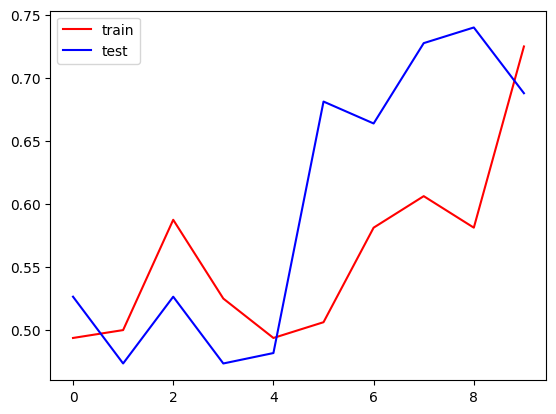

In [27]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'],color='red',label='train')
plt.plot(hist.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

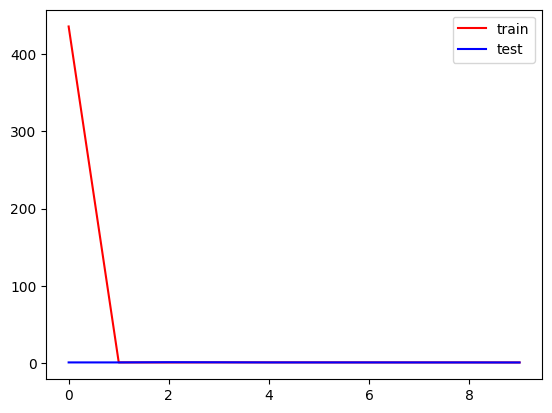

In [29]:
plt.plot(hist.history['loss'],color='red',label='train')
plt.plot(hist.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [30]:
model.save("./vgg16.h5")

In [31]:
import cv2
import pandas as pd

import skimage
from random import randint
import numpy as np
import PIL
import matplotlib.pyplot as plt

In [32]:
Image= cv2.imread('/content/archive_2/train/Image1.jpg')

In [34]:
image=PIL.Image.open('/content/archive_3/pred/pred0.jpg')
image_array= np.array(image)
float_array = image_array.astype(np.float32)
print(image_array)
print(float_array.dtype)


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
float32
